In [1]:
import warnings
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import copy
init_notebook_mode(connected=True)
sys.path.append("C:/dev/pycmqlib3/")
sys.path.append("C:/dev/pycmqlib3/misc_scripts/")
warnings.filterwarnings('ignore')
import misc
import data_handler as dh
import plotly_examples
import backtest
%matplotlib inline

In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu'] #, 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI'] #, 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd']#, 'AP', 'sp']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts


In [3]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']

start_date = datetime.date(2016,1,1)
end_date = datetime.date(2020,7,24)
sim_start_dict = {'AP': datetime.date(2018,1,1), \
                 'SM': datetime.date(2017,1,1), \
                 'SF': datetime.date(2017,1,1), \
                 'ni': datetime.date(2016,1,1), \
                 'pb': datetime.date(2016,7,1)}

sim_products = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'OI', \
                'l', 'pp', 'v', 'TA', 'MA', \
                'a', 'm', 'RM', 'y', 'p', 'SR', 'CF', 'jd',\
                'c', 'cs', 'cu', 'ni', 'zn', 'al', 'SM', 'SF', 'pb']
shift_mode = 1
freq = 'd'
delimiter = '-'
args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ni_args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'shift_mode': shift_mode}
bond_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}

df_list = []
atr_win = 20
for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = ni_args
    elif asset in bond_fut_mkts + ['bu']:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date    
    for idy, nb in enumerate([1, 2]):
        use_args['n'] = nb
        print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
        df = misc.nearby(asset, **use_args)
        if freq == 'm':
            df = misc.cleanup_mindata(df, asset)
        if (idx == 0) and (idy == 0) and (freq == 'm'):
            df_list.append(df[['date', 'min_id']])
        xdf = df[field_list]
        #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)
adf = pd.concat(df_list, axis = 1, sort = False)


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 1}
loading mkt = i, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_d

loading mkt = cu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 1}
loading mkt = cu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 2}
loading mkt = ni, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 1}
loading mkt = ni, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 2}
loading mkt = zn, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 7, 24), 'n': 1}
loading mkt = zn, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end

In [7]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args.get('quantile', 0.2)
    run_mode = input_args.get('run_mode', "momma")
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    
    mod_prod_list = [asset + str(1) for asset in product_list]
    select_cols = []
    for col in adf.columns:
        col_split = col.split(delimiter)
        if col_split[0][:-1] in product_list:
            select_cols.append(col)   
    df = adf[select_cols].copy()
    
    if start_date:
        df = df[df.index>= start_date]
    if end_date:
        df = df[df.index<= end_date]

    for asset in product_list:
        for i in range(1, 3):
            df[delimiter.join((asset + str(i), 'lr'))] = \
                (np.log(df[delimiter.join((asset + str(i), 'close'))] - df[delimiter.join((asset + str(i), 'shift'))]) \
                - np.log(df[delimiter.join((asset + str(i), 'close'))].shift(1) - df[delimiter.join((asset + str(i), 'shift'))]))\
                /(df[delimiter.join((asset + str(2), 'mth'))] - df[delimiter.join((asset + str(1), 'mth'))]) * 12.0           
        df[delimiter.join((asset + str(1), 'baslr'))] = df[delimiter.join((asset + str(1), 'lr'))] \
                                                        - df[delimiter.join((asset + str(2), 'lr'))]
        df[delimiter.join((asset + str(1), 'basmom'))] = df[delimiter.join((asset + str(1), 'baslr'))].rolling(mom_win).sum()
        df[delimiter.join((asset + str(1), 'basmomma'))] = df[delimiter.join((asset + str(1), 'basmom'))].rolling(ma_win).mean()

        if shift_mode == 1:
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]-df[delimiter.join((asset+ str(1), 'shift'))]
        elif shift_mode == 2:
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]* np.exp(-df[delimiter.join((asset+ str(1), 'shift'))])
        else:
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
        if pos_std == 0:
            df[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            df[delimiter.join((asset + str(1), 'std'))] = dh.ATR(df, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill') * 10.0

    select_cols = []
    for col in df.columns:
        col_split = col.split(delimiter)
        if (col_split[0] in mod_prod_list):
            select_cols.append(col)           

    xdf = df[select_cols].copy()
    basmom_df = xdf[[delimiter.join((asset+ str(1), 'basmom')) for asset in product_list]]
    basmom_df.columns = [ asset + str(1) for asset in product_list]
    xdf['prod_count'] = basmom_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    xdf['rebal_seqno'] = range(len(xdf.index))

    total_risk = 1000000.0
    margin_rate = [0.08, 0.08]
    pnl_tenors = ['1y', '2y', '3y', '4y']
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    
    kcut = int(quantile_cutoff * len(product_list))
    upper_rank = len(product_list) - kcut
    lower_rank = 1 + kcut 
    rank_df = basmom_df.rank(axis=1)

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = xdf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = xdf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = xdf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = xdf.index)
        rebal_flag = xdf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>upper_rank) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=upper_rank) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<lower_rank) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=lower_rank) & rebal_flag, asset] = 0.0   
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_sum = long_tmp.sum(axis=1)
        short_sum = short_tmp.sum(axis=1)
        long_pos = long_pos + long_tmp.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk \
                    /(xdf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(xdf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        xdf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        xdf[delimiter.join((asset, 'traded_price'))] = xdf[delimiter.join((asset, 'open'))]
        xdf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        xdf[delimiter.join((asset, 'cost'))] = \
                abs(xdf[delimiter.join((asset, 'pos'))] \
                - xdf[delimiter.join((asset, 'pos'))].shift(1)) * offset
        xdf[delimiter.join((asset, 'cost'))] = xdf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = xdf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = xdf['date']
            tdf['min_id'] = xdf['min_id']
        df_list.append(tdf)
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df = xdf[[delim.join((asset, 'pos')) for asset in product_list]]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res


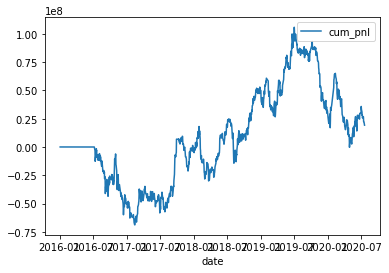

                               0
avg_pnl_1y         -2.775409e+05
avg_pnl_2y         -6.623016e+03
avg_pnl_3y          9.163304e+04
avg_pnl_4y          2.140131e+04
max_dd_period_1y   -2.030000e+02
max_dd_period_2y   -3.010000e+02
max_dd_period_3y   -3.010000e+02
max_dd_period_4y   -3.010000e+02
max_drawdown_1y    -9.353489e+07
max_drawdown_2y    -1.060576e+08
max_drawdown_3y    -1.060576e+08
max_drawdown_4y    -1.060576e+08
num_days_1y         2.420000e+02
num_days_2y         4.850000e+02
num_days_3y         7.300000e+02
num_days_4y         9.730000e+02
profit_dd_ratio_1y -7.180731e-01
profit_dd_ratio_2y -3.028698e-02
profit_dd_ratio_3y  6.307153e-01
profit_dd_ratio_4y  1.963413e-01
sharp_ratio_1y     -1.275425e+00
sharp_ratio_2y     -2.856140e-02
sharp_ratio_3y      4.204982e-01
sharp_ratio_4y      9.796434e-02
std_pnl_1y          3.454398e+06
std_pnl_2y          3.681092e+06
std_pnl_3y          3.459300e+06
std_pnl_4y          3.467949e+06
tot_cost_1y         2.361144e+06
tot_cost_2

In [8]:


total_risk = 10000000.0
rebal_freq = 5
margin_rate = [0.08, 0.08]
pnl_tenors = ['1y', '2y', '3y', '4y']
cost_ratio = 1.0
offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
offset_list = [ offset * 0.3 for offset in offset_list]
start_capital = 0.0
upper_thres = 0.00
lower_thres = 0.00
quantile_cutoff = 0.2
xdf['rebal_seqno'] = range(len(xdf.index))

kcut = int(quantile_cutoff * len(product_list))
upper_rank = len(product_list) - kcut
lower_rank = 1 + kcut 
rank_df = basmom_df.rank(axis=1)

long_pos = pd.DataFrame(0, columns = mod_prod_list, index = xdf.index)
short_pos = pd.DataFrame(0, columns = mod_prod_list, index = xdf.index)

for rebal_idx in range(rebal_freq):
    long_tmp = pd.DataFrame(columns=mod_prod_list, index = xdf.index)
    short_tmp = pd.DataFrame(columns=mod_prod_list, index = xdf.index)
    rebal_flag = xdf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
    for asset in mod_prod_list:
        long_tmp.loc[(rank_df[asset]>upper_rank) & rebal_flag, asset] = 1.0
        long_tmp.loc[(rank_df[asset]<=upper_rank) & rebal_flag, asset] = 0.0
        short_tmp.loc[(rank_df[asset]<lower_rank) & rebal_flag, asset] = 1.0
        short_tmp.loc[(rank_df[asset]>=lower_rank) & rebal_flag, asset] = 0.0   
    long_tmp = long_tmp.fillna(method='ffill').fillna(0)
    short_tmp = short_tmp.fillna(method='ffill').fillna(0)
    long_sum = long_tmp.sum(axis=1)
    short_sum = short_tmp.sum(axis=1)
    long_pos = long_pos + long_tmp.div(long_sum,axis=0)
    short_pos = short_pos + short_tmp.div(short_sum,axis=0)
extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
df_list = []

for asset, offset in zip(mod_prod_list, offset_list):
    long_pos[asset] = (long_pos[asset] * total_risk \
                /(xdf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
    short_pos[asset] = (short_pos[asset] * total_risk \
                /(xdf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
    xdf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
    xdf[delimiter.join((asset, 'traded_price'))] = xdf[delimiter.join((asset, 'open'))]
    xdf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
    xdf[delimiter.join((asset, 'cost'))] = \
            abs(xdf[delimiter.join((asset, 'pos'))] \
            - xdf[delimiter.join((asset, 'pos'))].shift(1)) * offset
    xdf[delimiter.join((asset, 'cost'))] = xdf[delimiter.join((asset, 'cost'))].fillna(0.0)
    fields = [delimiter.join((asset, field)) for field in extract_fields] 
    tdf = xdf[fields]
    tdf.columns = extract_fields
    tdf.index.name = 'date'    
    if freq == 'm':
        tdf['date'] = xdf['date']
        tdf['min_id'] = xdf['min_id']
    #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
    df_list.append(tdf)
(res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
ts[['cum_pnl']].plot()
plt.show()
pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(pnl_df)
#ts.to_csv("xs_carry_ind_metal_selected.csv")

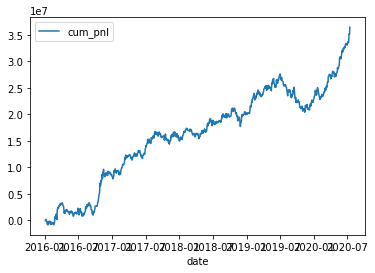

                               0
avg_pnl_1y          4.138264e+04
avg_pnl_2y          3.676061e+04
avg_pnl_3y          2.943811e+04
avg_pnl_4y          3.597021e+04
max_dd_period_1y   -1.200000e+02
max_dd_period_2y   -1.340000e+02
max_dd_period_3y   -1.340000e+02
max_dd_period_4y   -1.340000e+02
max_drawdown_1y    -5.908903e+06
max_drawdown_2y    -7.219690e+06
max_drawdown_3y    -7.219690e+06
max_drawdown_4y    -7.219690e+06
num_days_1y         2.430000e+02
num_days_2y         4.850000e+02
num_days_3y         7.300000e+02
num_days_4y         9.730000e+02
profit_dd_ratio_1y  1.701836e+00
profit_dd_ratio_2y  2.469482e+00
profit_dd_ratio_3y  2.976557e+00
profit_dd_ratio_4y  4.847716e+00
sharp_ratio_1y      1.813934e+00
sharp_ratio_2y      1.740449e+00
sharp_ratio_3y      1.503777e+00
sharp_ratio_4y      1.875298e+00
std_pnl_1y          3.621571e+05
std_pnl_2y          3.352908e+05
std_pnl_3y          3.107611e+05
std_pnl_4y          3.044899e+05
tot_cost_1y         2.131874e+05
tot_cost_2

In [24]:
xdf = df[select_cols].copy()
ryield_df = xdf[[delimiter.join((asset+ str(1), factor_name)) for asset in product_list]]
ryield_df.columns = product_list
xdf['prod_count'] = ryield_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)

total_risk = 10000000.0
rebal_freq = 1
margin_rate = [0.08, 0.08]
pnl_tenors = ['1y', '2y', '3y', '4y']
cost_ratio = 1.0
offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
offset_list = [ offset * 0.3 for offset in offset_list]
start_capital = 0.0
upper_thres = 0.00
lower_thres = 0.00
xdf['rebal_seqno'] = range(len(xdf.index))

long_pos = pd.DataFrame(0, columns = mod_prod_list, index = xdf.index)
short_pos = pd.DataFrame(0, columns = mod_prod_list, index = xdf.index)

for rebal_idx in range(rebal_freq):
    long_tmp = pd.DataFrame(columns=mod_prod_list, index = xdf.index)
    short_tmp = pd.DataFrame(columns=mod_prod_list, index = xdf.index)
    rebal_flag = xdf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
    for asset in mod_prod_list:
        long_tmp.loc[(xdf[delimiter.join((asset, factor_name))]>upper_thres) & rebal_flag, asset] = 1.0
        long_tmp.loc[(xdf[delimiter.join((asset, factor_name))]<=upper_thres) & rebal_flag, asset] = 0.0
        short_tmp.loc[(xdf[delimiter.join((asset, factor_name))]<lower_thres) & rebal_flag, asset] = 1.0
        short_tmp.loc[(xdf[delimiter.join((asset, factor_name))]>=lower_thres) & rebal_flag, asset] = 0.0
    long_tmp = long_tmp.fillna(method='ffill').fillna(0)
    short_tmp = short_tmp.fillna(method='ffill').fillna(0)
    long_pos = long_pos + long_tmp
    short_pos = short_pos + short_tmp
extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
df_list = []

for asset, offset in zip(mod_prod_list, offset_list):
    long_pos[asset] = (long_pos[asset] * total_risk \
                /(xdf['prod_count'] *xdf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
    short_pos[asset] = (short_pos[asset] * total_risk \
                /(xdf['prod_count'] *xdf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
    xdf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
    xdf[delimiter.join((asset, 'traded_price'))] = xdf[delimiter.join((asset, 'open'))]
    xdf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
    xdf[delimiter.join((asset, 'cost'))] = \
            abs(xdf[delimiter.join((asset, 'pos'))] \
            - xdf[delimiter.join((asset, 'pos'))].shift(1)) * offset
    xdf[delimiter.join((asset, 'cost'))] = xdf[delimiter.join((asset, 'cost'))].fillna(0.0)
    fields = [delimiter.join((asset, field)) for field in extract_fields] 
    tdf = xdf[fields]
    tdf.columns = extract_fields
    tdf.index.name = 'date'    
    if freq == 'm':
        tdf['date'] = xdf['date']
        tdf['min_id'] = xdf['min_id']
    #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
    df_list.append(tdf)
(res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
ts[['cum_pnl']].plot()
plt.show()
pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(pnl_df)
#ts.to_csv("ts_carry_ind_metal_selected.csv")